In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
metrics = pd.read_csv("data/qlstm_metrics.csv")
lstm = pd.read_csv("data/lstm_metrics.csv")

In [118]:
def filter_df(df: pd.DataFrame, column_name: str, value):
    """Filter a dataframe by a column name and value"""
    return df[df[column_name] == value]

def get_epoch_mean(df: pd.DataFrame):
    """
    Calculate the mean of numeric columns (all epochs) in the given DataFrame, excluding specific columns.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing numeric columns.
    """
    return df.select_dtypes(include='number').mean().drop(["epochs", "mse_train", "mse_test", "mae_train", "mae_test", "Reps", "loss_epoch_16", "loss_epoch_17", "loss_epoch_18", "loss_epoch_19", "loss_epoch_20", "loss_epoch_21", "loss_epoch_22", "loss_epoch_23", "loss_epoch_24", "loss_epoch_25", "loss_epoch_26", "loss_epoch_27", "loss_epoch_28", "loss_epoch_29", "loss_epoch_30", "loss_epoch_31", "loss_epoch_32", "loss_epoch_33", "loss_epoch_34", "loss_epoch_35", "loss_epoch_36", "loss_epoch_37", "loss_epoch_38", "loss_epoch_39", "loss_epoch_40", "loss_epoch_41", "loss_epoch_42", "loss_epoch_43", "loss_epoch_44", "loss_epoch_45", "loss_epoch_46", "loss_epoch_47", "loss_epoch_48", "loss_epoch_49", "loss_epoch_50"])

In [119]:
paper_1 = filter_df(metrics, 'FeatureMap', 'paper_1')
paper_2 = filter_df(metrics, 'FeatureMap', 'paper_2')
paper_3 = filter_df(metrics, 'FeatureMap', 'paper_3')
my_own = filter_df(metrics, 'FeatureMap', 'my_own')

In [120]:
paper_1_data_1 = filter_df(paper_1, 'data', 'data/data_damped_oscillator.csv')
paper_2_data_1 = filter_df(paper_2, 'data', 'data/data_damped_oscillator.csv')
paper_3_data_1 = filter_df(paper_3, 'data', 'data/data_damped_oscillator.csv')
paper_3_data_1 = filter_df(paper_3_data_1, 'epochs', 15)
my_own_data_1 = filter_df(my_own, 'data', 'data/data_damped_oscillator.csv')
classic_lstm_data_1 = filter_df(lstm, 'data', 'data/data_damped_oscillator.csv')

In [121]:
print(paper_1_data_1.shape)
print(paper_2_data_1.shape)
print(paper_3_data_1.shape)
print(my_own_data_1.shape)

(30, 60)
(30, 60)
(30, 60)
(30, 60)


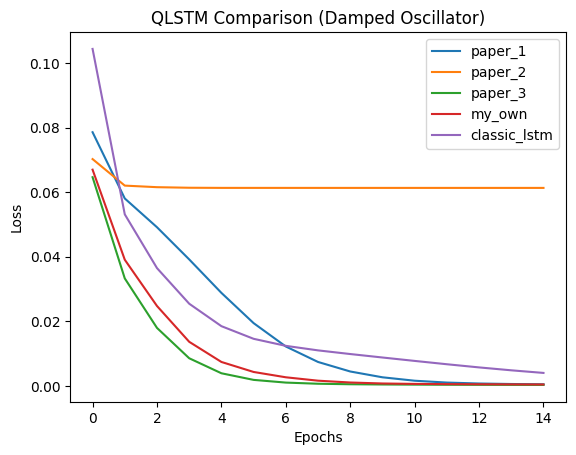

In [122]:
get_epoch_mean(paper_1_data_1).plot(label="paper_1")
get_epoch_mean(paper_2_data_1).plot(label="paper_2")
get_epoch_mean(paper_3_data_1).plot(label="paper_3")
get_epoch_mean(my_own_data_1).plot(label="my_own")
get_epoch_mean(classic_lstm_data_1).plot(label="classic_lstm")

# meta data for the plot
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("QLSTM Comparison (Damped Oscillator)")
plt.legend()

# customize the x-ticks
x_ticks = range(0, 15, 2)  
plt.xticks(x_ticks, labels=x_ticks)

plt.show()

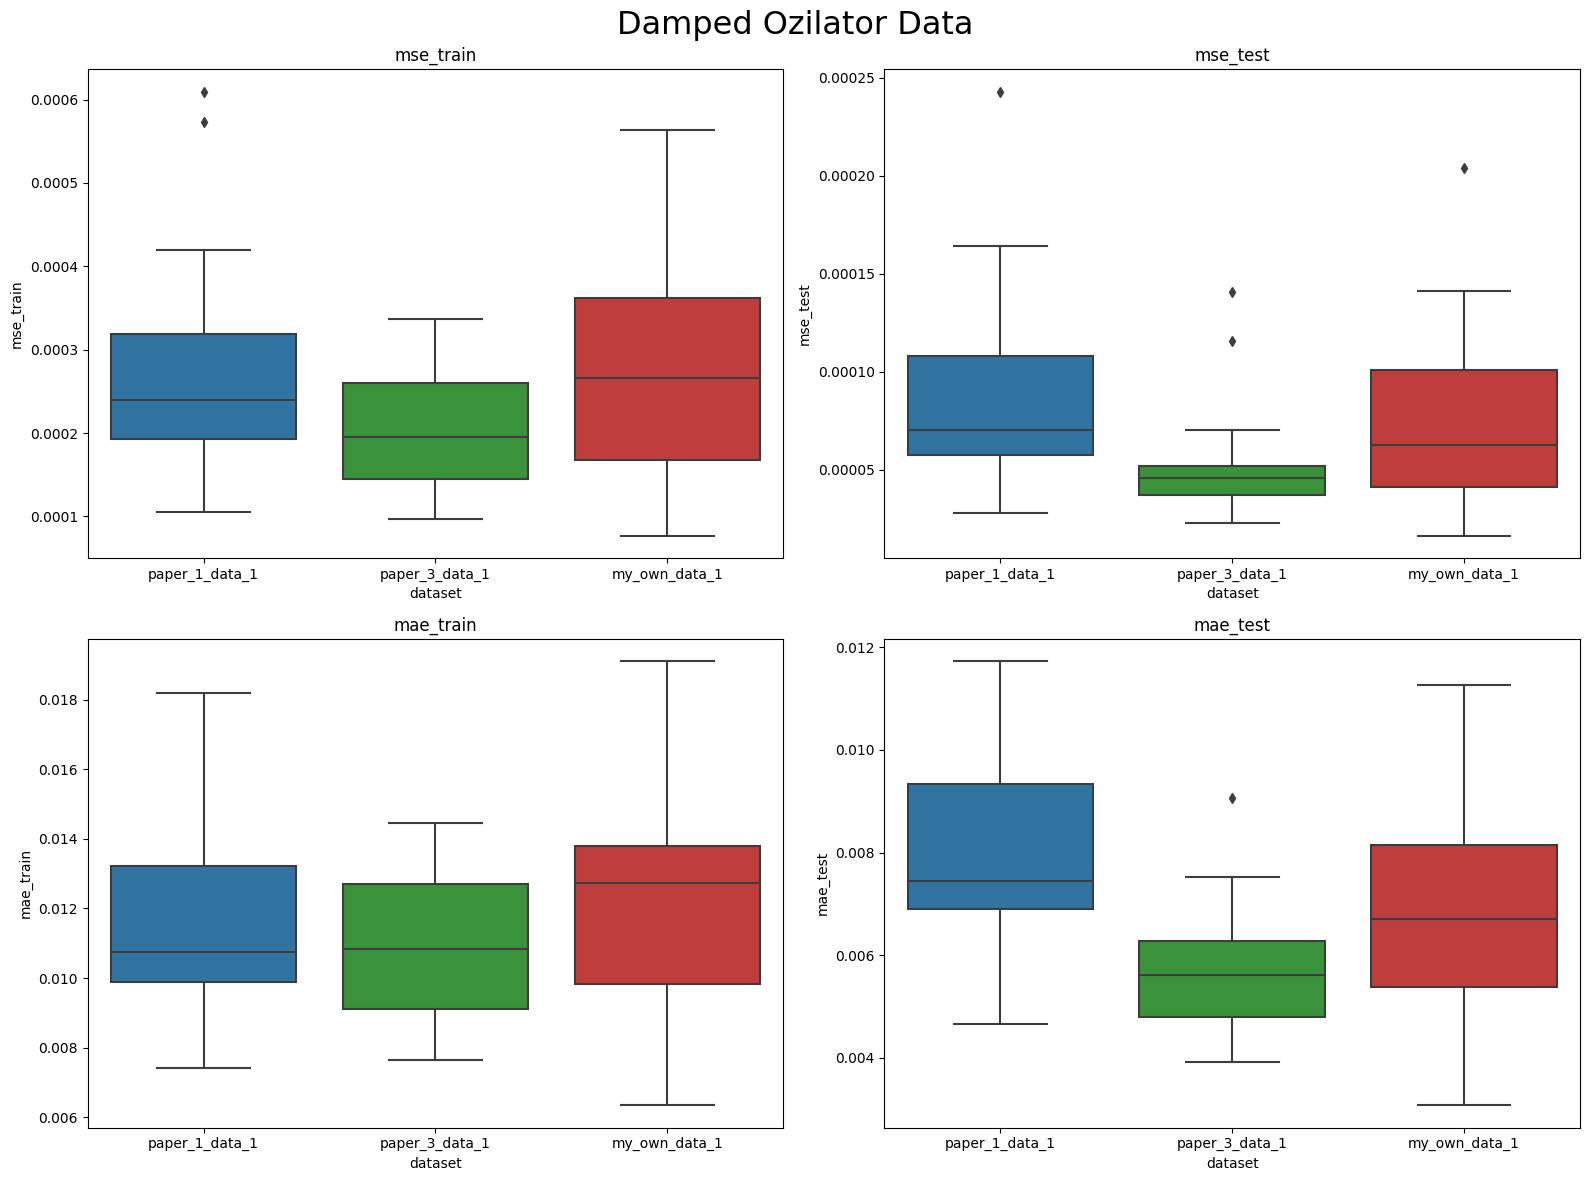

In [123]:
# add dataframes
data = pd.concat([paper_1_data_1.assign(dataset='paper_1_data_1'), 
                #   paper_2_data_1.assign(dataset='paper_2_data_1'), # the results are to bad -> worst case
                  paper_3_data_1.assign(dataset='paper_3_data_1'),
                  my_own_data_1.assign(dataset='my_own_data_1'),
                  # classic_lstm_data_1.assign(dataset='classic_lstm_data_1')
                  ])

# define colors for each dataset
colors = {'paper_1_data_1': '#1f77b4',
          'paper_2_data_1': '#ff7f0e',
          'paper_3_data_1': '#2ca02c',
          'my_own_data_1': '#d62728',
          'classic_lstm_data_1': '#9467bd'}

# subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# mse_train
sns.boxplot(x='dataset', y='mse_train', data=data, ax=axes[0, 0], palette=colors)
axes[0, 0].set_title('mse_train')

# mse_test
sns.boxplot(x='dataset', y='mse_test', data=data, ax=axes[0, 1], palette=colors)
axes[0, 1].set_title('mse_test')

# mae_train
sns.boxplot(x='dataset', y='mae_train', data=data, ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('mae_train')

# mae_test
sns.boxplot(x='dataset', y='mae_test', data=data, ax=axes[1, 1], palette=colors)
axes[1, 1].set_title('mae_test')

plt.suptitle('Damped Ozilator Data', fontsize=23)


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [124]:
paper_1_data_2 = filter_df(paper_1, 'data', 'data/custom_created_pattern.csv')
paper_2_data_2 = filter_df(paper_2, 'data', 'data/custom_created_pattern.csv')
paper_3_data_2 = filter_df(paper_3, 'data', 'data/custom_created_pattern.csv')
paper_3_data_2 = filter_df(paper_3_data_2, 'epochs', 15)
my_own_data_2 = filter_df(my_own, 'data', 'data/custom_created_pattern.csv')
classic_lstm_data_2 = filter_df(lstm, 'data', 'data/custom_created_pattern.csv')

In [125]:
print(paper_1_data_2.shape)
print(paper_2_data_2.shape)
print(paper_3_data_2.shape)
print(my_own_data_2.shape)

(30, 60)
(30, 60)
(30, 60)
(30, 60)


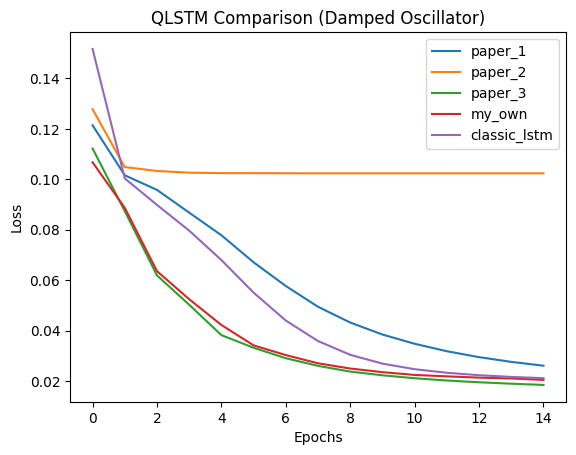

In [126]:
get_epoch_mean(paper_1_data_2).plot(label="paper_1")
get_epoch_mean(paper_2_data_2).plot(label="paper_2")
get_epoch_mean(paper_3_data_2).plot(label="paper_3")
get_epoch_mean(my_own_data_2).plot(label="my_own")
get_epoch_mean(classic_lstm_data_2).plot(label="classic_lstm")

# meta data for the plot
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("QLSTM Comparison (Damped Oscillator)")
plt.legend()

# customize the x-ticks
x_ticks = range(0, 15, 2)  
plt.xticks(x_ticks, labels=x_ticks)

plt.show()

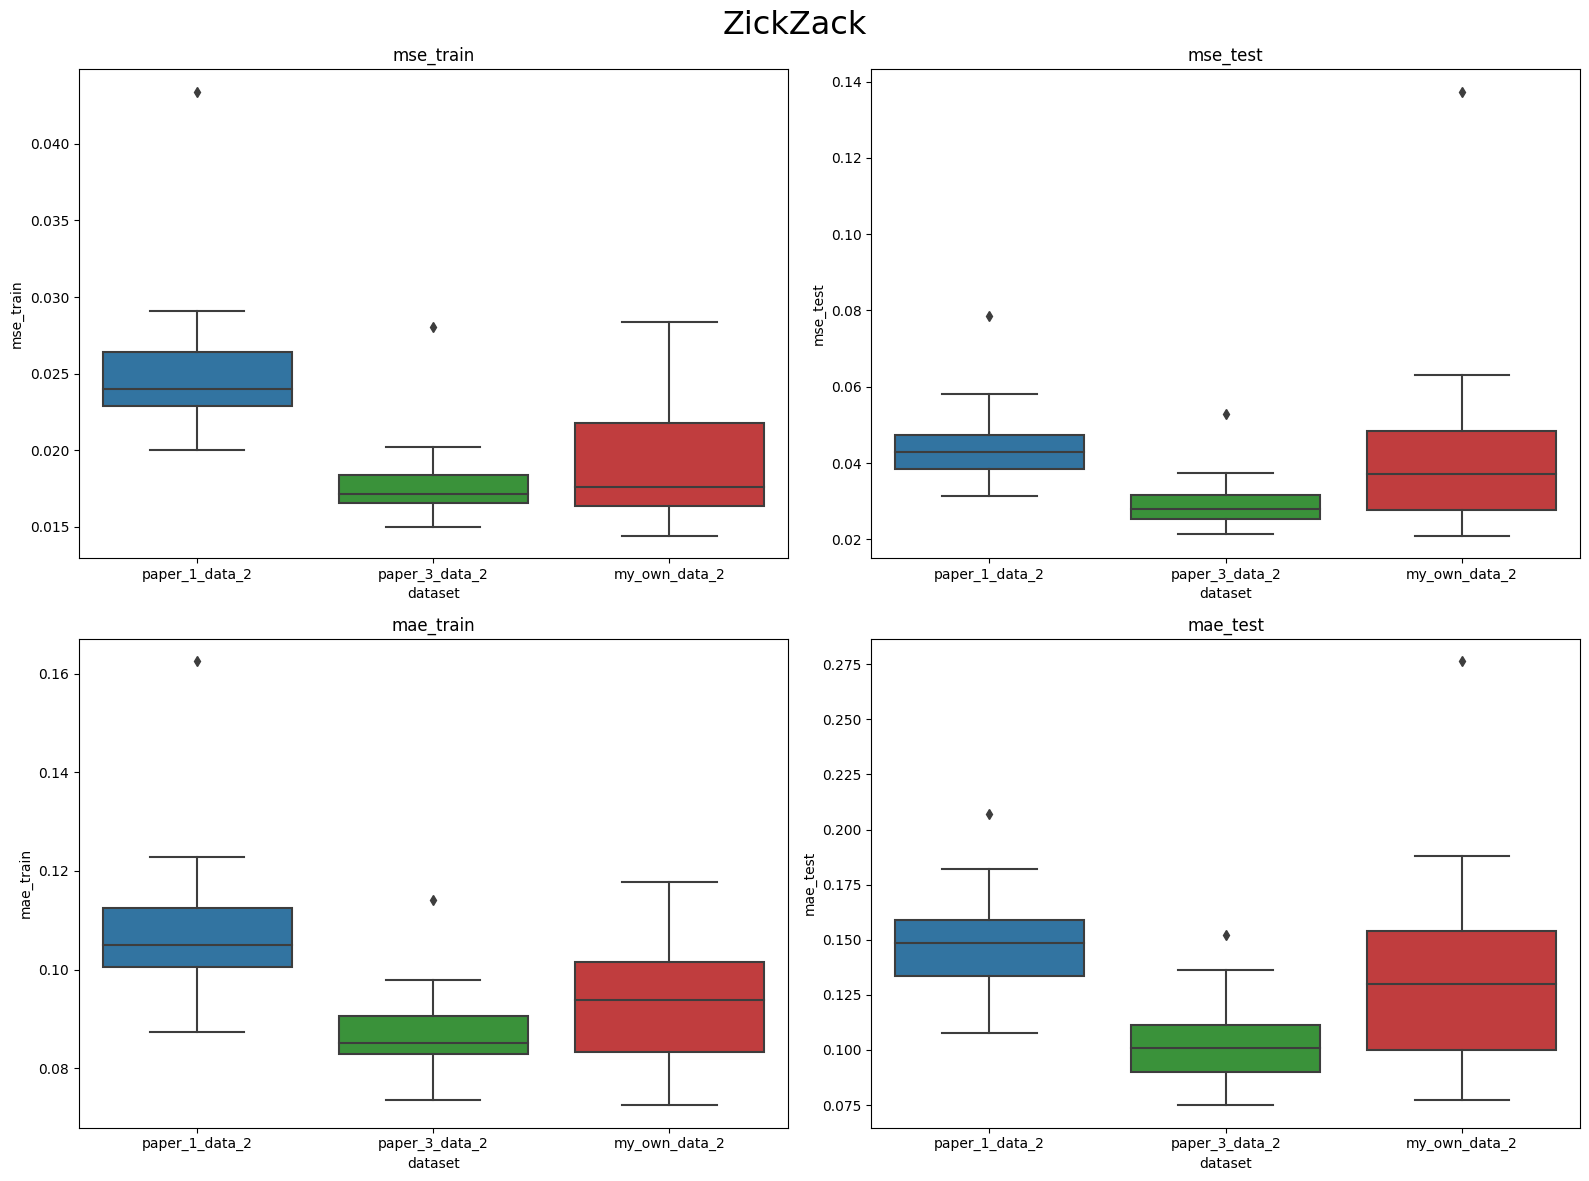

In [127]:
import matplotlib.pyplot as plt
import pandas as pd

# add dataframes
data = pd.concat([paper_1_data_2.assign(dataset='paper_1_data_2'), 
                #   paper_2_data_2.assign(dataset='paper_2_data_2'), # the results are to bad -> worst case
                  paper_3_data_2.assign(dataset='paper_3_data_2'),
                  my_own_data_2.assign(dataset='my_own_data_2'),
                  # classic_lstm_data_2.assign(dataset='classic_lstm_data_2')
                  ])

# define colors for each dataset
colors = {'paper_1_data_2': '#1f77b4',
          'paper_2_data_2': '#ff7f0e',
          'paper_3_data_2': '#2ca02c',
          'my_own_data_2': '#d62728',
          'classic_lstm_data_2': '#9467bd'}

#subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# mse_train
sns.boxplot(x='dataset', y='mse_train', data=data, ax=axes[0, 0], palette=colors)
axes[0, 0].set_title('mse_train')

# mse_test
sns.boxplot(x='dataset', y='mse_test', data=data, ax=axes[0, 1], palette=colors)
axes[0, 1].set_title('mse_test')

# mae_train
sns.boxplot(x='dataset', y='mae_train', data=data, ax=axes[1, 0], palette=colors)
axes[1, 0].set_title('mae_train')

# mae_test
sns.boxplot(x='dataset', y='mae_test', data=data, ax=axes[1, 1], palette=colors)
axes[1, 1].set_title('mae_test')

plt.suptitle('ZickZack', fontsize=23)


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Numerical Mean Values

In [128]:
selected_columns = ['mse_train', 'mse_test', 'mae_train', 'mae_test']

#### Damped Oscillator

In [129]:
print("Paper_1: Damped Oscillator")
paper_1_data_1[selected_columns].describe()

Paper_1: Damped Oscillator


,mse_train,mse_test,mae_train,mae_test
count,30.000000,30.000000,30.000000,30.000000
mean,0.000265,0.000087,0.011328,0.008022
std,0.000125,0.000046,0.002588,0.001885
min,0.000105,0.000028,0.007401,0.004648
25%,0.000193,0.000057,0.009873,0.006899
50%,0.000239,0.000070,0.010750,0.007452
75%,0.000319,0.000108,0.013229,0.009329
max,0.000610,0.000243,0.018203,0.011733


In [130]:
print("Paper_2: Damped Oscillator")
paper_2_data_1[selected_columns].describe()

Paper_2: Damped Oscillator


,mse_train,mse_test,mae_train,mae_test
count,30.000000,30.000000,30.000000,30.000000
mean,0.063084,0.028808,0.223324,0.152070
std,0.000007,0.000003,0.000058,0.000039
min,0.063071,0.028805,0.223184,0.151976
25%,0.063079,0.028806,0.223293,0.152049
50%,0.063083,0.028807,0.223323,0.152069
75%,0.063088,0.028810,0.223362,0.152095
max,0.063097,0.028814,0.223416,0.152132


In [131]:
print("Paper_3: Damped Oscillator")
paper_3_data_1[selected_columns].describe()

Paper_3: Damped Oscillator


,mse_train,mse_test,mae_train,mae_test
count,30.000000,30.000000,30.000000,30.000000
mean,0.000203,0.000050,0.010815,0.005664
std,0.000074,0.000024,0.002073,0.001017
min,0.000096,0.000023,0.007631,0.003921
25%,0.000145,0.000037,0.009104,0.004786
50%,0.000195,0.000046,0.010847,0.005611
75%,0.000260,0.000052,0.012695,0.006267
max,0.000337,0.000140,0.014449,0.009061


In [132]:
print("my_own: Damped Oscillator")
my_own_data_1[selected_columns].describe()

my_own: Damped Oscillator


,mse_train,mse_test,mae_train,mae_test
count,30.000000,30.000000,30.000000,30.000000
mean,0.000284,0.000072,0.012326,0.006771
std,0.000135,0.000043,0.003111,0.002183
min,0.000077,0.000016,0.006337,0.003070
25%,0.000167,0.000041,0.009817,0.005373
50%,0.000266,0.000063,0.012746,0.006711
75%,0.000362,0.000101,0.013798,0.008154
max,0.000564,0.000204,0.019118,0.011270


In [133]:
classic_lstm_data_1[classic_lstm_data_1.epochs == 15][selected_columns].describe()

,mse_train,mse_test,mae_train,mae_test
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.003638,0.001628,0.049415,0.032402
std,0.002493,0.001183,0.021606,0.015451
min,0.000049,0.000008,0.005406,0.002254
25%,0.001375,0.000521,0.033017,0.020307
50%,0.003604,0.001635,0.053887,0.035820
75%,0.005577,0.002519,0.066888,0.044699
max,0.010938,0.005236,0.093921,0.062721


#### Custom Created Dataset

In [134]:
print("Paper_1: Custom Created Pattern")
paper_1_data_2[selected_columns].describe()

Paper_1: Custom Created Pattern


,mse_train,mse_test,mae_train,mae_test
count,30.000000,30.000000,30.000000,30.000000
mean,0.025046,0.044608,0.107805,0.148023
std,0.004183,0.009037,0.013734,0.020498
min,0.020044,0.031325,0.087306,0.107542
25%,0.022919,0.038457,0.100434,0.133647
50%,0.024018,0.042994,0.104961,0.148514
75%,0.026432,0.047281,0.112589,0.158753
max,0.043412,0.078428,0.162583,0.206972


In [135]:
print("Paper_2: Custom Created Pattern")
paper_2_data_2[selected_columns].describe()

Paper_2: Custom Created Pattern


,mse_train,mse_test,mae_train,mae_test
count,30.000000,30.000000,30.000000,30.000000
mean,0.106116,0.139874,0.236653,0.311668
std,0.000031,0.000512,0.000015,0.000784
min,0.106079,0.138647,0.236617,0.309781
25%,0.106092,0.139672,0.236647,0.311363
50%,0.106107,0.139995,0.236656,0.311855
75%,0.106125,0.140291,0.236665,0.312304
max,0.106195,0.140558,0.236672,0.312707


In [136]:
print("Paper_3: Custom Created Pattern")
paper_3_data_2[selected_columns].describe()

Paper_3: Custom Created Pattern


,mse_train,mse_test,mae_train,mae_test
count,30.000000,30.000000,30.000000,30.000000
mean,0.017757,0.029135,0.086897,0.102250
std,0.002338,0.006275,0.007641,0.018564
min,0.014993,0.021321,0.073533,0.074876
25%,0.016540,0.025383,0.082808,0.090230
50%,0.017141,0.027982,0.085089,0.100717
75%,0.018408,0.031534,0.090653,0.111489
max,0.028076,0.052736,0.114201,0.152355


In [137]:
print("my_own: Custom Created Pattern")
my_own_data_2[selected_columns].describe()

my_own: Custom Created Pattern


,mse_train,mse_test,mae_train,mae_test
count,30.000000,30.000000,30.000000,30.000000
mean,0.019504,0.040761,0.093348,0.131142
std,0.004224,0.021995,0.012679,0.042882
min,0.014413,0.020899,0.072460,0.077202
25%,0.016375,0.027746,0.083231,0.100157
50%,0.017633,0.037166,0.093785,0.129768
75%,0.021747,0.048430,0.101596,0.153988
max,0.028370,0.137410,0.117727,0.276450


In [138]:
classic_lstm_data_2[classic_lstm_data_2.epochs == 15][selected_columns].describe()

,mse_train,mse_test,mae_train,mae_test
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.020893,0.036271,0.095417,0.132266
std,0.002517,0.008297,0.011004,0.024621
min,0.017887,0.025678,0.078706,0.090491
25%,0.019336,0.030741,0.087787,0.114226
50%,0.020167,0.033856,0.092256,0.126656
75%,0.021514,0.039009,0.099960,0.143990
max,0.047508,0.082037,0.154595,0.230533
